# How to become a Spacebar Artist w/ Python

## Getting Started

A lot of people love music, but not a lot of people know how to start working with it. I come from a purely engineering background and have close to 0 understanding about music theory in general. Here, my goal is to cook up some documents that should serve as both an introduction to Python, but also an introduction to signals and machine learning applications - we will avoid math in this notebook and simply focus on applications.

To get started with this, you will need a few things. Ideally you are using either VSCode or Linux, so interacting with the terminal will be straightforward.
First, we need to ensure that you can work with JupyterNotebook from an IDE. To do this, we need to create a virtual environment. If you don't already, go into your terminal:
```
python3 -m venv PW
source PW/bin/activate
pip install librosa spleeter ipykernel
python -m ipykernel install --user --name=PW
sudo apt install ffmpeg
```

With this


Next, we need to make sure that all dependencies are installed, especially **Librosa** and **Spleeter**. To install these, you should run the following in the terminal:

```
pip install librosa spleeter matplotlib scipy numpy
```
Once those are done installing, we can start cooking. To test if there are any dependencies missing, just import them:

In [1]:
import librosa
import spleeter

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

Finally, we should also import os to conveniently work with data in folders. For your convenience, we will format a lot of this for you, but it might be insightful to learn how to use the os library eventually.

In [3]:
import os

## Working With The Data

A brief explanation of the data you will receive. I manually labeled the files I am working with in a convenient way that 1) Holds Order Information and 2) Contains Relevant MetaInformation (mostly for readability and interpretability). Therefore the data might look something like: ```1_songName_author.mp3```

In [4]:
folder_path = 'Songs'  # Replace with the actual folder path

file_list = []
for file_name in os.listdir(folder_path):
    file_list.append(file_name)

file_list.sort()
print(file_list)

['01_Silence_Tiesto.mp3', '02_RayOfSolar_SwedishHouseMafia.mp3', '03_FeelYourGhost_Tiesto.mp3', '04_Strangers_DomDolla.mp3', '05_Hungover_JohnSummit.mp3', '06_Miracle_Adriatique.mp3', '07_OnMyKnees_RUFUSDUSOL.mp3', '08_Tears_Skrillex.mp3', '09_Dashstar_Knock2.mp3', '10_how2fly_ISOxo.mp3', '11_Strangers_KenyaGrace.mp3', '12_Spiritum_Maddix.mp3', '13_ICDeDevil_Verruf.mp3', '14_WWDiscoClub_IHateModels.mp3', '15_NobodyCares_SpicyMentality.mp3', 'accompaniment', 'vocals']


You can see above that  a few things are done. We managed to figure out all the different song files and sort them by order to mix.

The next step is to get the components of the songs that we will be using. For DJ Mixing, the most useful parts of the songs to interact with are **Vocals** and **Accompaniment**. We will use spleeter to do all of the hard machine learning work to split the song into these 2 stems.

2024-04-04 22:56:32.920528: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


(6508552, 2)
INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
INFO:tensorflow:Calling model_fn.
I

2024-04-04 22:56:34.853211: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-04 22:56:34.853224: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jibby2k1): /proc/driver/nvidia/version does not exist


INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from pretrained_models/2stems/model


2024-04-04 22:56:35.616475: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 22:56:35.636199: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'vocals': array([[-1.02452375e-08, -1.83088789e-09],
       [ 1.06905338e-08, -1.21264367e-08],
       [ 5.76921870e-08, -1.15824257e-08],
       ...,
       [ 7.90967806e-06,  9.55439828e-06],
       [ 5.49279957e-06,  8.99961560e-06],
       [ 1.24207945e-05,  2.18804007e-06]], dtype=float32), 'accompaniment': array([[-5.0550602e-06, -1.0906762e-05],
       [-6.5175664e-06, -2.2726115e-05],
       [-8.8648776e-06, -2.4084089e-05],
       ...,
       [-4.3406931e-04,  4.1534379e-04],
       [-4.4643457e-04,  3.6546373e-04],
       [-2.8308525e-04,  2.1413044e-04]], dtype=float32)}
(6508552, 2)
(6508552, 2)
INFO:spleeter:File Songs/vocals/10_how2fly_ISOxo.mp3 written succesfully
INFO:spleeter:File Songs/accompaniment/10_how2fly_ISOxo.mp3 written succesfully


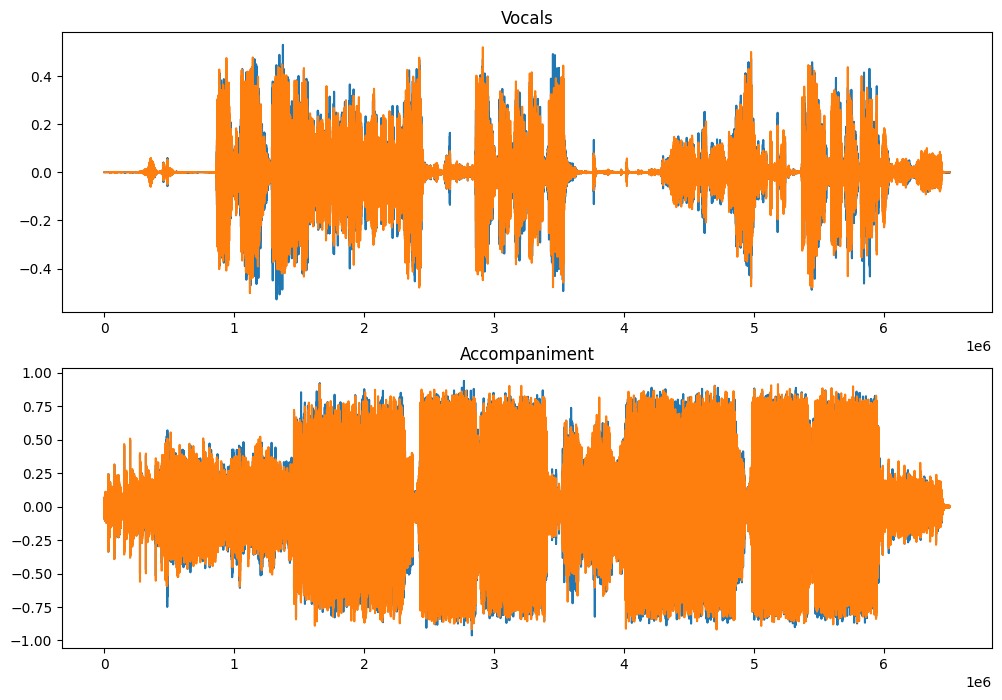

(7148794, 2)
INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Apply unet for vocals_spectrogram
INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:t

Exception ignored in: <generator object Estimator.predict at 0x75938bdb4cf0>
Traceback (most recent call last):
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 618, in predict
    with tf.Graph().as_default() as g:
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5821, in get_controller
    with super(_DefaultGraphStack,
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5633, in get_controller
    raise AssertionError(
AssertionError: Nesting violated for default stack of <class 'tensorflow.python.framework.

{'vocals': array([[-1.5322171e-04, -2.8236053e-07],
       [-1.9878658e-04,  3.9134546e-05],
       [-2.4344411e-04,  7.9911893e-05],
       ...,
       [ 7.4560160e-07, -1.1558960e-05],
       [ 2.6866842e-06, -1.0685149e-05],
       [ 2.7696419e-06, -7.9900001e-06]], dtype=float32), 'accompaniment': array([[-9.0232911e-04, -1.9335247e-03],
       [-1.9714453e-03, -1.6604832e-03],
       [-2.0802820e-03,  1.5225383e-03],
       ...,
       [ 2.5791462e-05, -4.8555499e-05],
       [ 2.9089451e-05, -5.0549163e-05],
       [ 1.8190747e-05, -3.4123674e-05]], dtype=float32)}
(7148794, 2)
(7148794, 2)
INFO:spleeter:File Songs/vocals/11_Strangers_KenyaGrace.mp3 written succesfully
INFO:spleeter:File Songs/accompaniment/11_Strangers_KenyaGrace.mp3 written succesfully


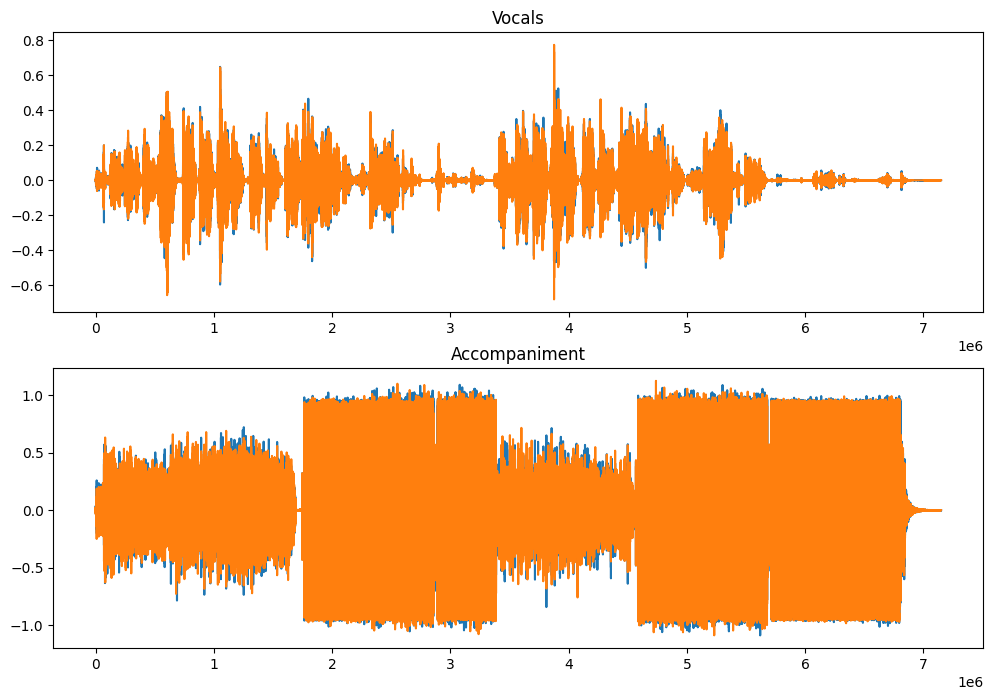

(1313280, 2)
INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Apply unet for vocals_spectrogram
INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:t

Exception ignored in: <generator object Estimator.predict at 0x7592ea9c8660>
Traceback (most recent call last):
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 618, in predict
    with tf.Graph().as_default() as g:
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5821, in get_controller
    with super(_DefaultGraphStack,
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5633, in get_controller
    raise AssertionError(
AssertionError: Nesting violated for default stack of <class 'tensorflow.python.framework.

{'vocals': array([[ 6.2224177e-09, -1.3037861e-07],
       [ 1.0909085e-08, -1.3944755e-07],
       [-2.5248646e-08, -1.4013457e-07],
       ...,
       [ 1.5349300e-03,  2.4614763e-04],
       [-2.4729734e-03,  2.2390168e-03],
       [-1.8306089e-03,  1.1317650e-03]], dtype=float32), 'accompaniment': array([[-1.0529087e-08,  1.1309818e-07],
       [-2.9274577e-08,  1.2917350e-07],
       [ 2.9521670e-08,  1.5749467e-07],
       ...,
       [ 4.2364511e-01,  5.2839077e-01],
       [ 4.2296565e-01,  4.9219939e-01],
       [ 2.7409261e-01,  3.3317661e-01]], dtype=float32)}
(1313280, 2)
(1313280, 2)
INFO:spleeter:File Songs/vocals/12_Spiritum_Maddix.mp3 written succesfully
INFO:spleeter:File Songs/accompaniment/12_Spiritum_Maddix.mp3 written succesfully


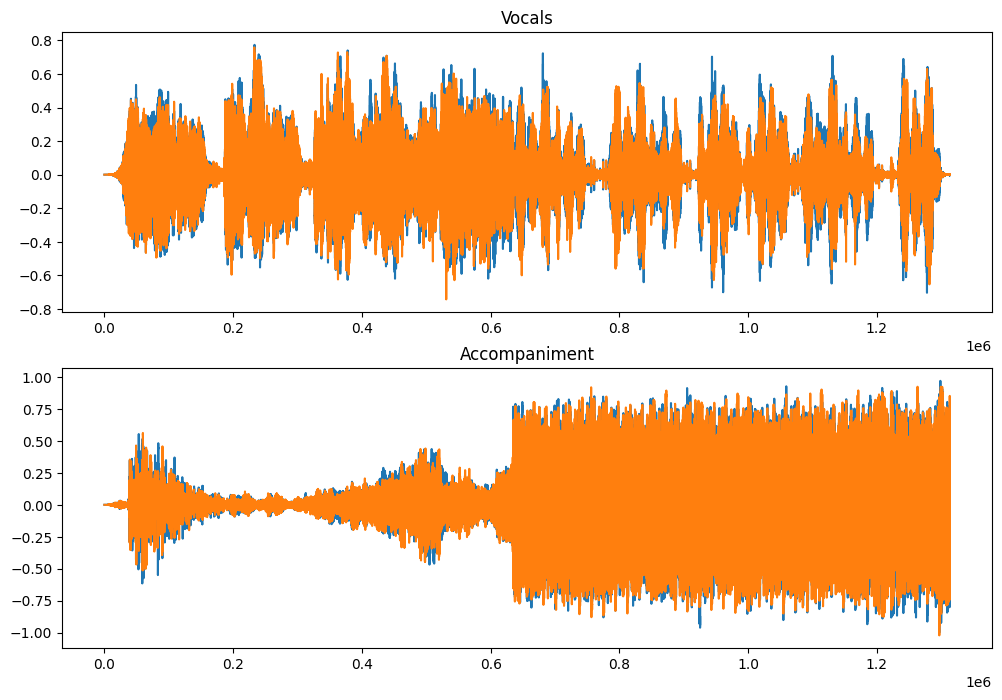

(16688074, 2)
INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Apply unet for vocals_spectrogram
INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:

Exception ignored in: <generator object Estimator.predict at 0x75938ba0ca50>
Traceback (most recent call last):
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 618, in predict
    with tf.Graph().as_default() as g:
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5821, in get_controller
    with super(_DefaultGraphStack,
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5633, in get_controller
    raise AssertionError(
AssertionError: Nesting violated for default stack of <class 'tensorflow.python.framework.

{'vocals': array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32), 'accompaniment': array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)}
(16688074, 2)
(16688074, 2)
INFO:spleeter:File Songs/vocals/13_ICDeDevil_Verruf.mp3 written succesfully
INFO:spleeter:File Songs/accompaniment/13_ICDeDevil_Verruf.mp3 written succesfully


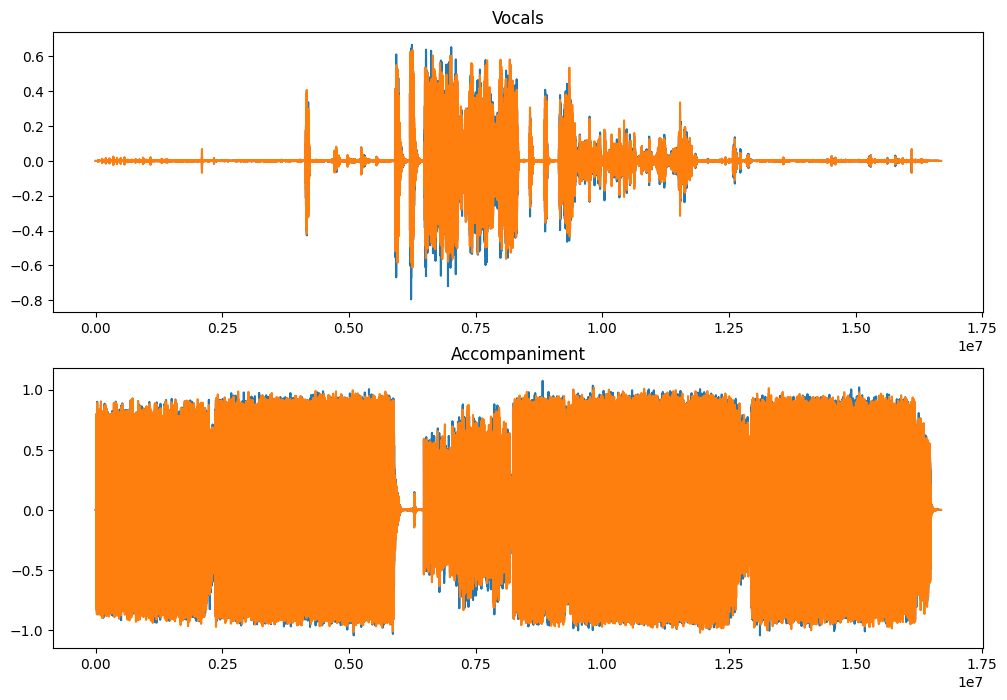

(24865344, 2)
INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Apply unet for vocals_spectrogram
INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:

Exception ignored in: <generator object Estimator.predict at 0x75920c7538b0>
Traceback (most recent call last):
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 618, in predict
    with tf.Graph().as_default() as g:
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5821, in get_controller
    with super(_DefaultGraphStack,
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5633, in get_controller
    raise AssertionError(
AssertionError: Nesting violated for default stack of <class 'tensorflow.python.framework.

{'vocals': array([[-5.72379690e-07, -1.54971715e-07],
       [ 2.31633805e-07,  1.40654475e-08],
       [ 4.98746260e-07,  2.19017167e-07],
       ...,
       [-4.99915927e-07,  1.98022349e-07],
       [ 7.51387734e-06, -3.41195732e-06],
       [ 1.15572821e-05, -7.44452507e-07]], dtype=float32), 'accompaniment': array([[ 1.15001276e-04,  9.72361304e-05],
       [-6.81547999e-06, -2.96074140e-05],
       [-1.36189192e-04, -1.80544390e-04],
       ...,
       [-1.83641605e-04, -9.97746538e-05],
       [ 2.49416244e-05, -2.91925302e-04],
       [ 1.46712366e-04, -2.56123865e-04]], dtype=float32)}
(24865344, 2)
(24865344, 2)
INFO:spleeter:File Songs/vocals/14_WWDiscoClub_IHateModels.mp3 written succesfully
INFO:spleeter:File Songs/accompaniment/14_WWDiscoClub_IHateModels.mp3 written succesfully


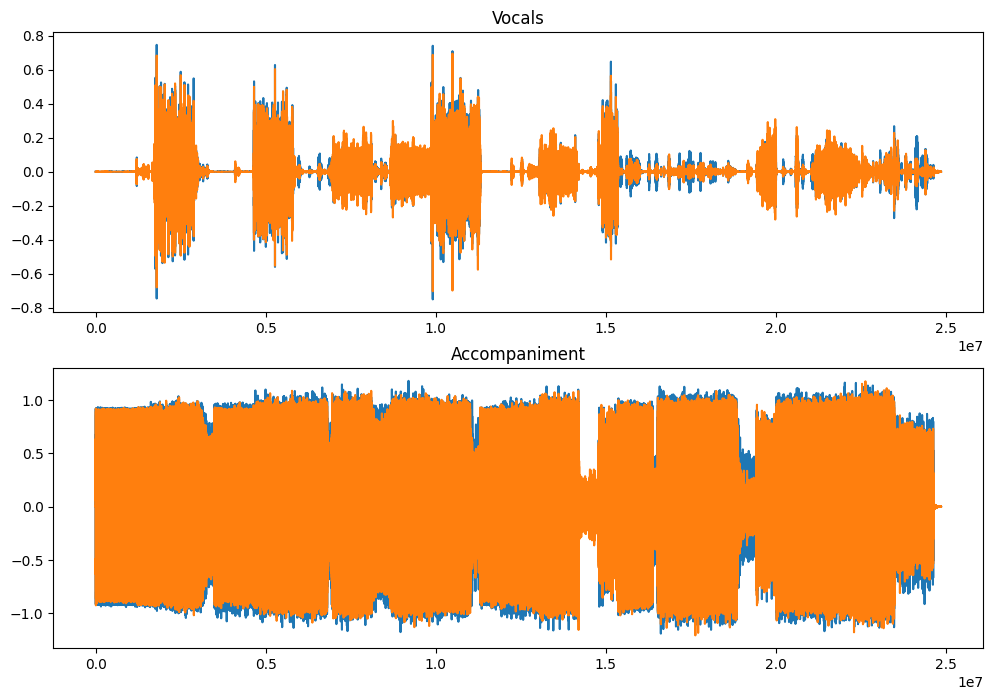

(13608000, 2)
INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Apply unet for vocals_spectrogram
INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:

Exception ignored in: <generator object Estimator.predict at 0x75938bb8ff40>
Traceback (most recent call last):
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 618, in predict
    with tf.Graph().as_default() as g:
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5821, in get_controller
    with super(_DefaultGraphStack,
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/home/jibby2k1/MusicWorkshops/ProgrammingProduction/PW/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 5633, in get_controller
    raise AssertionError(
AssertionError: Nesting violated for default stack of <class 'tensorflow.python.framework.

{'vocals': array([[ 1.4000236e-06,  1.2961449e-06],
       [ 1.2912267e-06,  1.1745425e-06],
       [-1.3939541e-06, -1.2905548e-06],
       ...,
       [ 5.2539422e-04,  1.7267103e-04],
       [ 9.0207951e-04,  5.6416483e-04],
       [ 6.1074388e-04,  8.8513742e-05]], dtype=float32), 'accompaniment': array([[0.00672034, 0.00448207],
       [0.01728377, 0.01687466],
       [0.02517957, 0.02727353],
       ...,
       [0.04258552, 0.05637607],
       [0.04192429, 0.05507892],
       [0.02856777, 0.03748248]], dtype=float32)}
(13608000, 2)
(13608000, 2)
INFO:spleeter:File Songs/vocals/15_NobodyCares_SpicyMentality.mp3 written succesfully
INFO:spleeter:File Songs/accompaniment/15_NobodyCares_SpicyMentality.mp3 written succesfully


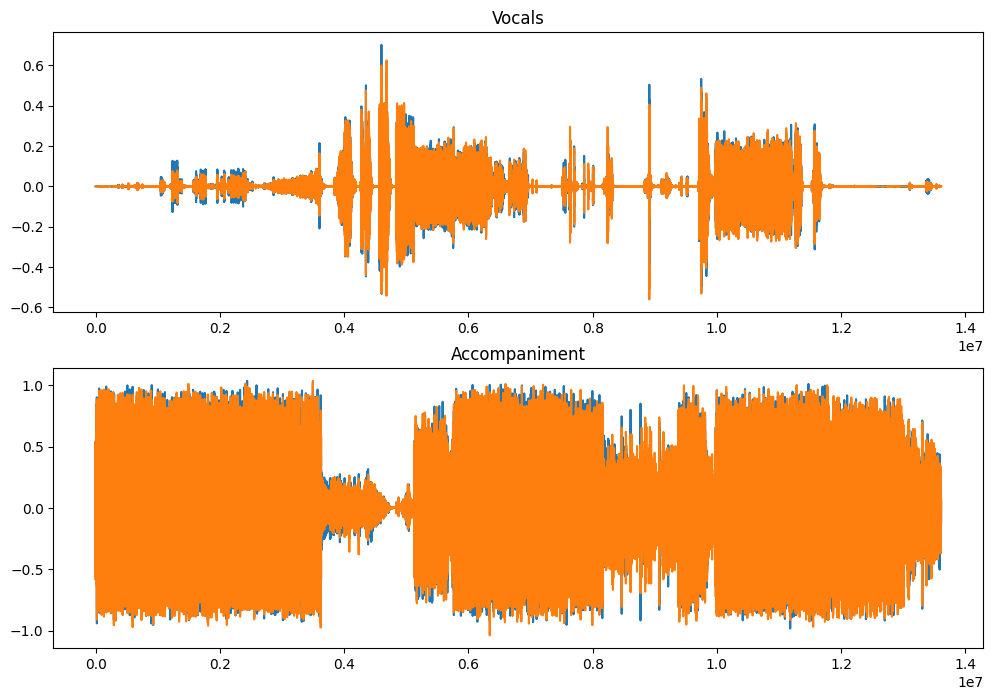

In [5]:
from spleeter.audio.adapter import AudioAdapter
from spleeter.separator import Separator
import gc

audio_adapter = AudioAdapter.default()

# Ensure the directories exist
os.makedirs('Songs/vocals', exist_ok=True)
os.makedirs('Songs/accompaniment', exist_ok=True)

for file_name in file_list[9:]:
    if not file_name.endswith('.mp3'):
        continue
    file_path = os.path.join(folder_path, file_name)
    waveform, fs = audio_adapter.load(file_path)
    print(waveform.shape)
    
    separator = Separator('spleeter:2stems')
    prediction = separator.separate(waveform)

    del waveform
    gc.collect()

    print(prediction)
    print(prediction['vocals'].shape)
    print(prediction['accompaniment'].shape)
    
    audio_adapter.save('Songs/vocals/' + file_name, prediction['vocals'], fs)
    audio_adapter.save('Songs/accompaniment/' + file_name, prediction['accompaniment'], fs)
    
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.title('Vocals')
    plt.plot(prediction['vocals'])
    plt.subplot(2, 1, 2)
    plt.title('Accompaniment')
    plt.plot(prediction['accompaniment'])
    plt.show()

    # Delete the variables and free up the memory
    del prediction
    gc.collect()

Cool! So now we have all the songs split into the different parts that most DJs address throughout their songs. The next DJ concept to tackle is "Signal Processing"

## Signal Processing

To mix, DJ's typically play with a few knobs and buttons on their DJ Mixer board which will allow them to either control frequency content, or apply interesting song-effects. In general, an understanding of these 2 is the bare minimum to properly DJ a set (live or pre-made), so let's dive into these.

### Effects

Adding effects or "Fx" to an audio signal is a creative and interesting way to alter your audio so that it can sound better. We will discuss a few techniques that are used to help spice up a song or transition into a new one.

#### Repeat/Loop

The most simple effect that someone can do is to loop a part of a song - there are many musical implications about this but we do not need to dive into them. Consider a portion of a song from t = k $\to$ k+T. 

In [ ]:
fakeSong = [i for i in range(1000)]
k = 250
T = 50
reps = 3 # Number of repetitions
newFakeSong = fakeSong[:k] + fakeSong[k:k+T] * reps + fakeSong[k+T:]
plt.figure();
plt.plot(newFakeSong);
plt.plot(fakeSong);

#### Frequency Control
When mixing, the **MOST** essential effectin DJing is controlling frequency. To succesfully mix songs together, the songs must have the same BPM (or be integer scalar multiples of the other). Songs are produced for the public and many times their frequencies do not match, to fix this is actually really simple, we just need to find the BPM in a song and match it to the other song's BPM.

In [ ]:
import librosa

def get_bpm(song, sr=22050):
    # Load the audio file
    # Calculate the tempo (BPM)
    tempo, _ = librosa.beat.beat_track(song, sr=sr)
    return tempo
def apply_speed_change(song, speed_change_factor, sr=22050):
    # Apply the speed change
    y_changed = librosa.effects.time_stretch(song, speed_change_factor)
    # Save the modified audio to a new file
    return y_changed
def bpm_match(song1, song2 , sr=22050):
    # Get the BPM of song1
    song1_bpm = get_bpm(song1)
    # Get the BPM of song2
    song2_bpm = get_bpm(song2)
    # Calculate the speed change factor
    speed_change_factor = song2_bpm / song1_bpm
    # Apply the speed change to song1
    return apply_speed_change(song1, speed_change_factor, sr=sr)

#### Equalization/Filtering
One of the most essential effects in DJing is controlling frequency content. There are many times when a DJ may want to control how loud a part of a song is with respect to the rest of the rest of the song. I.E. if you want to emphasize a song's vocals, you may consider amplifying the treble and filtering the bass.

In [ ]:
import numpy as np
from scipy.signal import cheby2, sosfilt
import librosa

#T1 and T2 are the start and end times of the song segment to be equalized
def apply_equalization(song, T1, T2, bass_gain=1, other_gain=1, treble_gain=1, sr=22050):
    def cheby2_bandpass(lowcut, highcut, fs, ripple, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = cheby2(order, ripple, [low, high], btype='band', output='sos')
        return sos
    def cheby2_bandpass_filter(data, lowcut, highcut, fs, ripple, order=5):
        sos = cheby2_bandpass(lowcut, highcut, fs, ripple, order=order)
        y = sosfilt(sos, data)
        return y
    N1, N2 = librosa.time_to_samples([T1, T2], sr=fs)
    lowbass, highbass, lowtreble, hightreble = 20, 300, 2000, 20000
    bass = cheby2_bandpass_filter(song[N1:N2], lowbass, highbass, fs, ripple=20, order=6)
    other = cheby2_bandpass_filter(song[N1:N2], highbass, lowtreble, fs, ripple=20, order=6)
    treble = cheby2_bandpass_filter(song[N1:N2], lowtreble, hightreble, fs, ripple=20, order=6)
    equalized_song = song.copy()
    equalized_song[N1:N2] = bass_gain*bass + other_gain*other + treble_gain*treble
    return equalized_song

#### Reverb

A great effect to use on any song, it simulates the effect of the reflections of sounds in a physical space. It can make audio sound like you are inside of a barrel or a concert hall, depending on the desired outcome.

In [ ]:
import numpy as np

def apply_reverb(song, reverb_time, decay):
    # Generate reverb impulse response
    t = np.arange(0, reverb_time, 1/(44100))
    reverb = np.exp(-decay * t)
    # Apply reverb to the signal
    reverb_signal = song + np.convolve(song, reverb, mode='same')
    reverb_signal = reverb_signal / np.max(np.abs(reverb_signal))
    return reverb_signal

#### Delay/Echoes

In [ ]:
import numpy as np

def apply_echoes(signal, delay, decay):
    # Calculate the number of samples to delay
    delay_samples = int(delay * 44100)
    # Create an empty array to store the echoed signal
    echoed_signal = np.zeros_like(signal)
    # Apply the echo effect
    for i in range(delay_samples, len(signal)):
        echoed_signal[i] = signal[i] + decay * signal[i - delay_samples]
    return echoed_signal
